Author: Xi Ming.

## Build a Multilayer Perceptron from Scratch based on PyTorch.

PyTorch's automatic differentiation mechanism can help quickly implement multilayer perceptrons.

### Import Packages.

In [55]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

import numpy as np

print('pytorch version:',torch.__version__,'\ntorchvision version: ',torchvision.__version__,'\nnumpy version:' ,np.__version__)

pytorch version: 1.7.1+cu101 
torchvision version:  0.8.2+cu101 
numpy version: 1.18.2


### Settings

In [56]:
# model runs on  GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
learning_rate = 1e-2
momentum = 0.9
num_epochs = 10
batch_size = 128

# Architecture
num_features = 784
num_hidden_1 = 400
num_hidden_2 = 200
num_classes = 10

### Dataset: MNIST

In [57]:
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))]),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))]))


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


### Define model

In [58]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, num_features, num_classes):
        super(MultilayerPerceptron, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(num_features, num_hidden_1),
            nn.Sigmoid(),
            nn.Linear(num_hidden_1, num_hidden_2),
            nn.Sigmoid(),
            nn.Linear(num_hidden_2, num_classes)
        )

    def forward(self, x):
        x = self.model(x)
        return x

### Init model, define optimizer and loss function

In [59]:
model = MultilayerPerceptron(num_features=num_features,
                             num_classes=num_classes)
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

criterion = nn.CrossEntropyLoss()

### Training model

In [60]:
train_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):

    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.view(-1, 28*28)
        
        # forward
        logits = model(data)
        loss = criterion(logits, target)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx  % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data.item()))

    train_loss_list.append(loss.data.item())
    
    test_loss = 0
    correct = 0 
    model.eval()
    with torch.no_grad():
        # test
        total_correct = 0
        total_num = 0
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(-1, 28*28)

            logits = model(data)
            test_loss += criterion(logits, target).item()

            pred = logits.data.max(1)[1]
            correct += pred.eq(target.data).sum()

        test_loss /= len(test_loader.dataset)
        test_acc = 100. * correct / len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset), test_acc))

        test_acc_list.append(test_acc)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.321454
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.224704
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.826435
Train Epoch: 0 [38400/60000 (64%)]	Loss: 1.124504
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.841719

Test set: Average loss: 0.0053, Accuracy: 8232/10000 (82%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.670159
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.455997
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.508148
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.435971
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.537225

Test set: Average loss: 0.0030, Accuracy: 8909/10000 (89%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.446308
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.325904
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.334509
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.268637
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.335764

Test set: Average loss: 0.0025, Accuracy: 9083/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.275971
Train Epoch: 3 [12800/60000 (21%)]	Lo

### Plot Training index curve

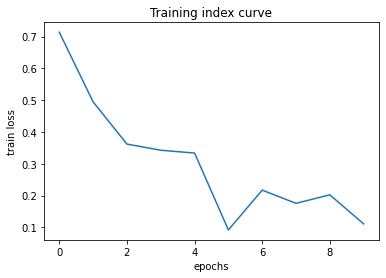

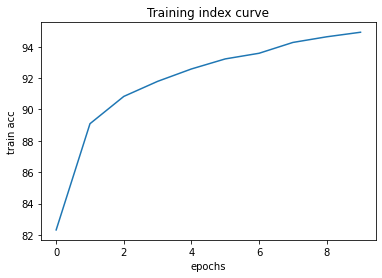

In [61]:
import matplotlib
import matplotlib.pyplot as plt

x = np.arange(0, num_epochs)

plt.title("Training index curve")
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.show()

plt.title("Training index curve")
plt.plot(x, test_acc_list, label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('train acc')

plt.show()


### Visual Inspection

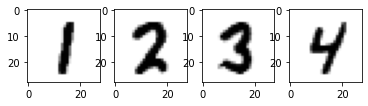

Predicted labels tensor([1, 2, 3, 4], device='cuda:0')


In [62]:
for features, targets in test_loader:
    break

fig, ax = plt.subplots(1, 4)
data = data.to('cpu')
for i in range(4):
    ax[i].imshow(data[i].view(28, 28), cmap=matplotlib.cm.binary)
plt.show()

data = data.to(device)
predictions = model.forward(data[:4].view(-1, 28*28))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions)